In [99]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  # for overall clustering evaluation
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format= '{:20.2f}'.format

In [90]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 5.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [6]:
df= pd.read_excel("online_retail_II 2.xlsx", sheet_name=0)

In [8]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [13]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [14]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [16]:
df[df["Quantity"]<10].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
16,489436,22119,PEACE WOODEN BLOCK LETTERS,3,2009-12-01 09:06:00,6.95,13078.0,United Kingdom
21,489436,22107,PIZZA PLATE IN BOX,4,2009-12-01 09:06:00,3.75,13078.0,United Kingdom
22,489436,22194,BLACK DINER WALL CLOCK,2,2009-12-01 09:06:00,8.50,13078.0,United Kingdom
26,489436,21756,BATH BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
27,489436,21333,CLASSIC WHITE FRAME,6,2009-12-01 09:06:00,2.95,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
31,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2009-12-01 09:08:00,2.10,15362.0,United Kingdom
32,489437,22145,CHRISTMAS CRAFT HEART STOCKING,6,2009-12-01 09:08:00,2.10,15362.0,United Kingdom


In [19]:
df["Invoice"]=df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [20]:
#Is C the only chracter that appears

df["Invoice"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [21]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [23]:
pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.13/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
df[df["StockCode"].str.contains("^DOT", na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


Data Cleaning

In [30]:
cleaned_df = df.copy()
#converting to str
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

# invoice should be exactly 6 digits
mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [32]:
cleaned_df["StockCode"]= cleaned_df["StockCode"].astype("str")
mask= (
    (cleaned_df["StockCode"].str.match("^\\d{5}$")== True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$")== True)
    
)
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,515252.000000,515252,515252.000000,407695.000000
mean,10.956689,2010-06-28 17:40:54.093763584,4.221416,15368.504107
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-21 13:27:00,1.250000,13997.000000
50%,3.000000,2010-07-06 13:13:00,2.100000,15321.000000
75%,10.000000,2010-10-15 14:27:00,4.210000,16812.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,104.354314,NaN,63.435424,1679.795700


In [33]:
# getting rid of Customer ID with null values

cleaned_df.dropna(subset=["Customer ID"], inplace= True)
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.000000,407695,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294188,15368.504107
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.842229,NaN,34.756655,1679.795700


In [36]:
cleaned_df[cleaned_df["Price"]==0]
len(cleaned_df[cleaned_df["Price"]==0])

31

In [38]:
cleaned_df= cleaned_df[cleaned_df["Price"]>0]
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407664.000000,407664,407664.000000,407664.000000
mean,13.585585,2010-07-01 10:15:11.871688192,3.294438,15368.592598
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.840747,NaN,34.757965,1679.762138


In [39]:
# How much data has been dropped during cleaning:

len(cleaned_df)/len(df)

0.7758216118798541

77.58% of data remains following cleaning

Feature Engineering

In [40]:
cleaned_df["SalesLineTotal"]= cleaned_df["Quantity"]* cleaned_df["Price"]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [43]:
aggregated_df= cleaned_df.groupby(by="Customer ID", as_index = False) \
    .agg(
        MonetaryValue= ("SalesLineTotal", "sum"),
        Frequency= ("Invoice", "nunique"),
        LastInvoiceDate= ("InvoiceDate", "max")
    )
aggregated_df.head(5)


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,372.86,11,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,222.16,1,2010-09-27 14:59:00
3,12349.0,2671.14,3,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [48]:
max_invoice_date=aggregated_df["LastInvoiceDate"].max()
aggregated_df["Recency"]= (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

#how long it's been since last transaction compared to most recent transaction

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,372.86,11,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,222.16,1,2010-09-27 14:59:00,73
3,12349.0,2671.14,3,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


Outlier Detection Prior to KMeans Clustering

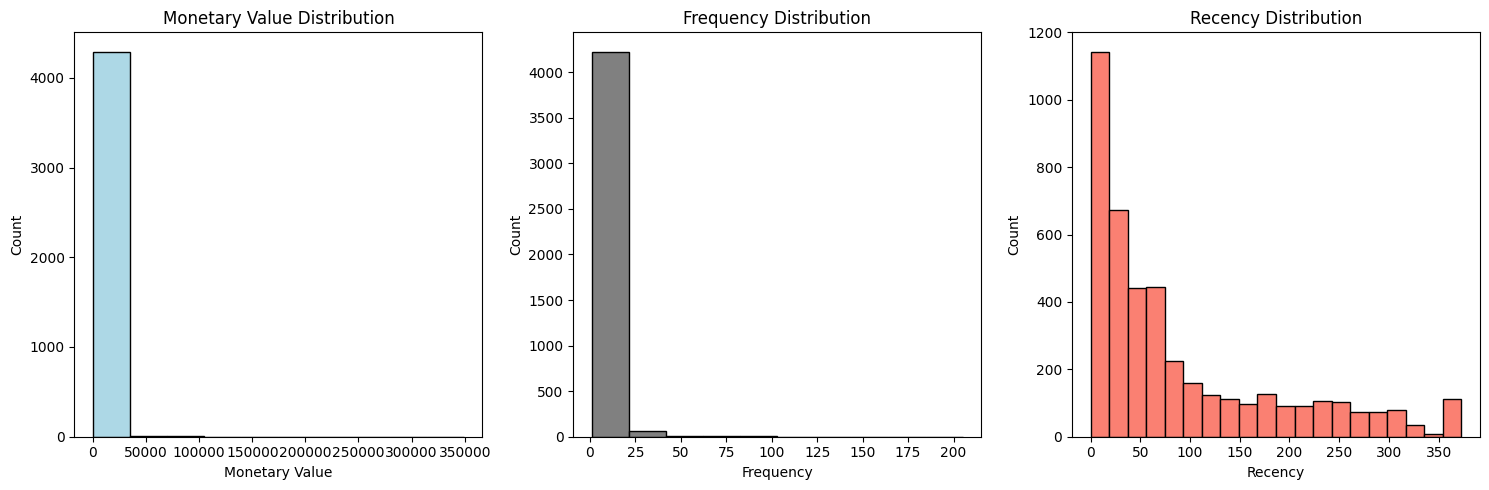

In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='lightblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='grey', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Notes: 
Some outliers detected under monetary value as well as frequency distribution

Boxplot graph will help detect the outliers in more detail

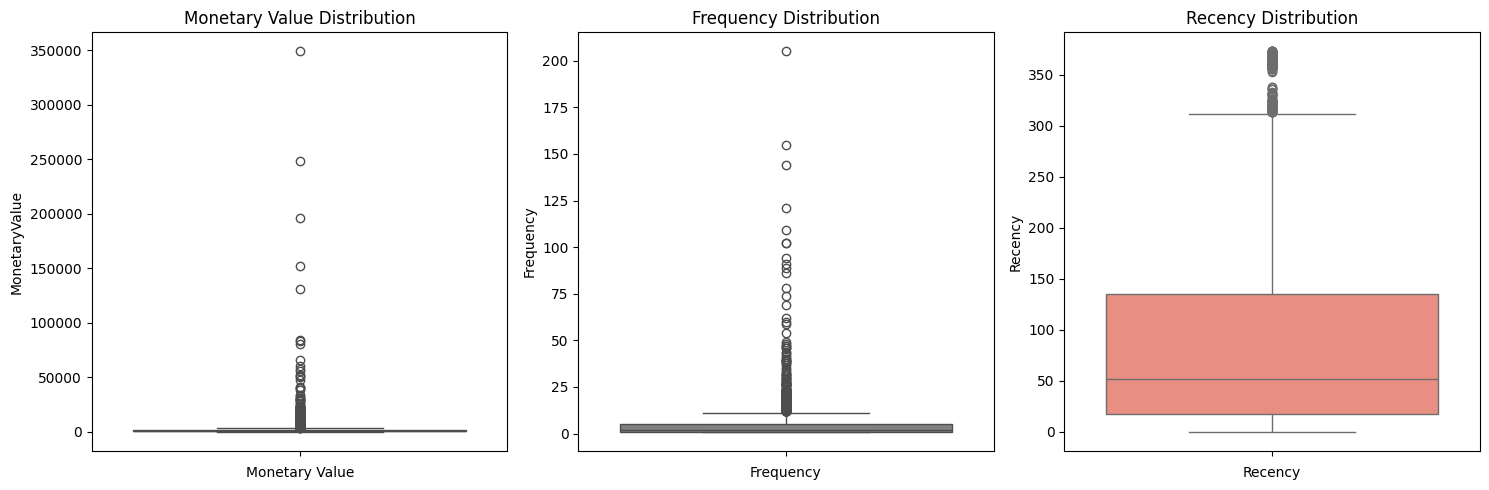

In [66]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data= aggregated_df['MonetaryValue'], color='blue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data= aggregated_df['Frequency'], color ='grey')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data= aggregated_df['Recency'], color ='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Boxplots for Monetary Value and Frequency Distribution Contain Extreme Outliers

These outliers are still important to include because the outliers represent high paying customers


Separating Outlier Data

In [77]:
MV_Q1 = aggregated_df["MonetaryValue"].quantile(.25)
MV_Q3 = aggregated_df["MonetaryValue"].quantile(.75)
MV_IQR= MV_Q3- MV_Q1

monetary_outliers_df= aggregated_df[(aggregated_df["MonetaryValue"]> (MV_Q3+1.5*MV_IQR)) |(aggregated_df["MonetaryValue"]< (MV_Q3-1.5*MV_IQR)) ].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,428.000000,428.000000,428.000000,428,428.000000
mean,15060.060748,12319.513145,17.280374,2010-11-09 16:05:02.943925248,29.883178
min,12357.000000,3851.010000,1.000000,2010-01-17 11:33:00,0.000000
25%,13573.000000,4610.065000,8.000000,2010-11-08 10:35:30,3.000000
50%,14927.000000,6262.580000,12.000000,2010-11-26 11:15:30,13.000000
75%,16653.000000,10409.572500,18.000000,2010-12-06 09:54:45,31.000000
max,18260.000000,349164.350000,205.000000,2010-12-09 19:32:00,326.000000
std,1729.846873,26044.459639,20.487179,NaN,49.228287


In [78]:
F_Q1 = aggregated_df["Frequency"].quantile(.25)
F_Q3 = aggregated_df["Frequency"].quantile(.75)
F_IQR= F_Q3- F_Q1

frequency_outliers_df= aggregated_df[(aggregated_df["Frequency"]> (F_Q3+1.5*F_IQR)) |(aggregated_df["Frequency"]< (F_Q3-1.5*F_IQR)) ].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,285.000000,285.000000,285.000000,285,285.000000
mean,15307.796491,14374.576372,23.908772,2010-11-23 13:55:24.631578880,15.971930
min,12422.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13715.000000,4331.410000,13.000000,2010-11-19 15:51:00,2.000000
50%,15311.000000,6507.670000,17.000000,2010-12-02 08:52:00,7.000000
75%,16814.000000,11645.700000,23.000000,2010-12-07 10:08:00,20.000000
max,18260.000000,349164.350000,205.000000,2010-12-09 19:32:00,211.000000
std,1773.255926,31518.798551,22.833570,NaN,25.778429


In [114]:
non_outliers_df= aggregated_df[(~aggregated_df.isin(monetary_outliers_df))&(~aggregated_df.isin(frequency_outliers_df))]
non_outliers_df=non_outliers_df.dropna()
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3828.00,3828.00,3828.00,3828,3828.00
mean,15372.74,889.86,2.86,2010-09-02 15:28:27.931034368,97.91
min,12346.00,2.95,1.00,2009-12-01 09:55:00,0.00
25%,13910.50,281.21,1.00,2010-07-07 12:00:45,22.00
50%,15380.50,589.13,2.00,2010-10-12 12:44:30,58.00
75%,16846.25,1273.61,4.00,2010-11-17 13:09:30,155.00
max,18287.00,3817.18,11.00,2010-12-09 20:01:00,373.00
std,1693.30,824.81,2.24,NaN,98.74


Non Outlier Boxplots

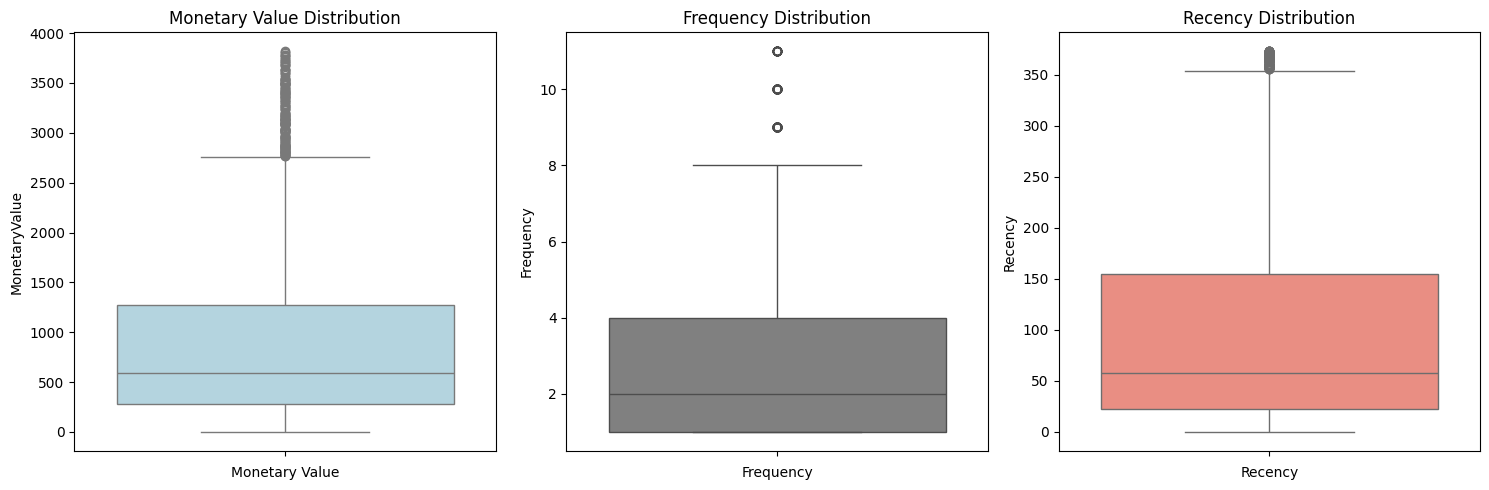

In [115]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data= non_outliers_df['MonetaryValue'], color='lightblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data= non_outliers_df['Frequency'], color ='grey')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data= non_outliers_df['Recency'], color ='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [95]:
scaler= StandardScaler()
scaled_data=scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data_df= pd.DataFrame(scaled_data, index= non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

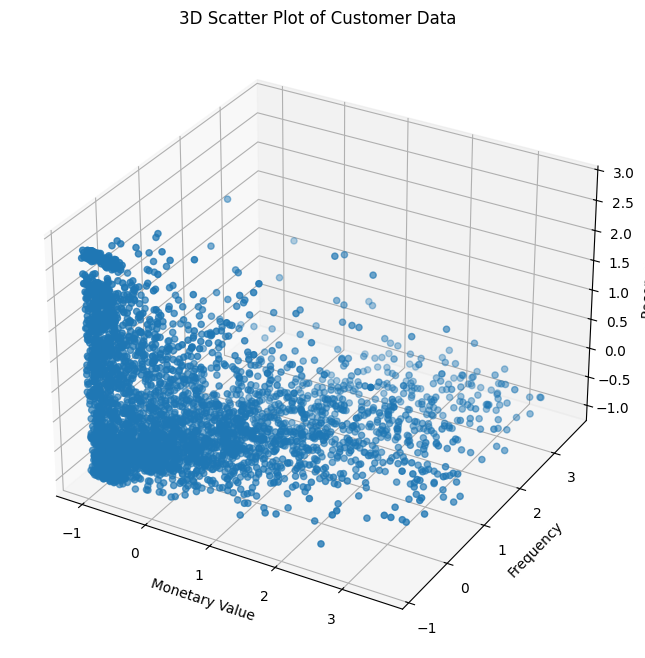

In [101]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8,8))

ax= fig.add_subplot(projection="3d")
scatter= ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

KMeans Clustering and the Elbow Method

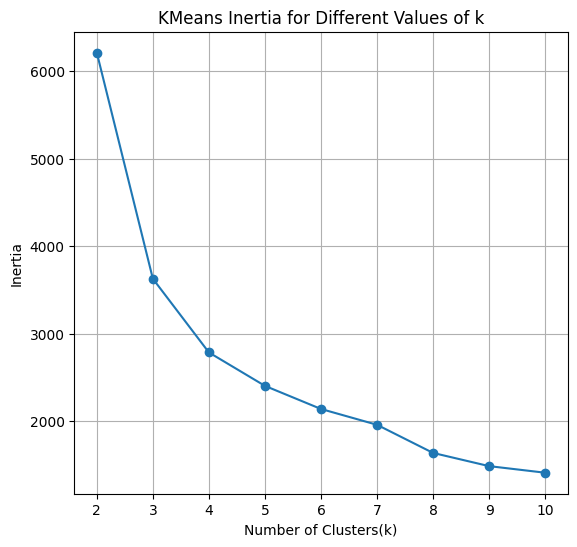

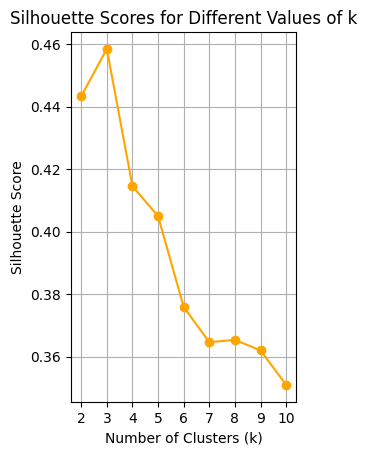

In [116]:
scaled_data_df=scaled_data_df.dropna()
max_k=10

inertia=[]
silhoutte_scores = []
k_values= range(2,max_k +1)

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=42, max_iter= 1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize= (14,6))
plt.subplot(1, 2, 1)

plt.plot (k_values, inertia, marker= 'o')
plt.title ('KMeans Inertia for Different Values of k')
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

Silhouette Score to determine optimal number of clusters
Cluster 4 has a higher silhouette score, meaning that there will be less overlap amongst the different clusters.

In [117]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 2, 1, ..., 0, 2, 2], shape=(3828,), dtype=int32)

In [118]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,372.86,11.00,2010-06-28 13:53:00,164.00,3
1,12347.00,1323.32,2.00,2010-12-07 14:57:00,2.00,2
2,12348.00,222.16,1.00,2010-09-27 14:59:00,73.00,1
3,12349.00,2671.14,3.00,2010-10-28 08:23:00,42.00,2
4,12351.00,300.93,1.00,2010-11-29 15:23:00,10.00,1
...,...,...,...,...,...,...
4307,18283.00,641.77,6.00,2010-11-22 15:30:00,17.00,2
4308,18284.00,461.68,1.00,2010-10-04 11:33:00,66.00,1
4309,18285.00,427.00,1.00,2010-02-17 10:24:00,295.00,0
4310,18286.00,1296.43,2.00,2010-08-20 11:57:00,111.00,2


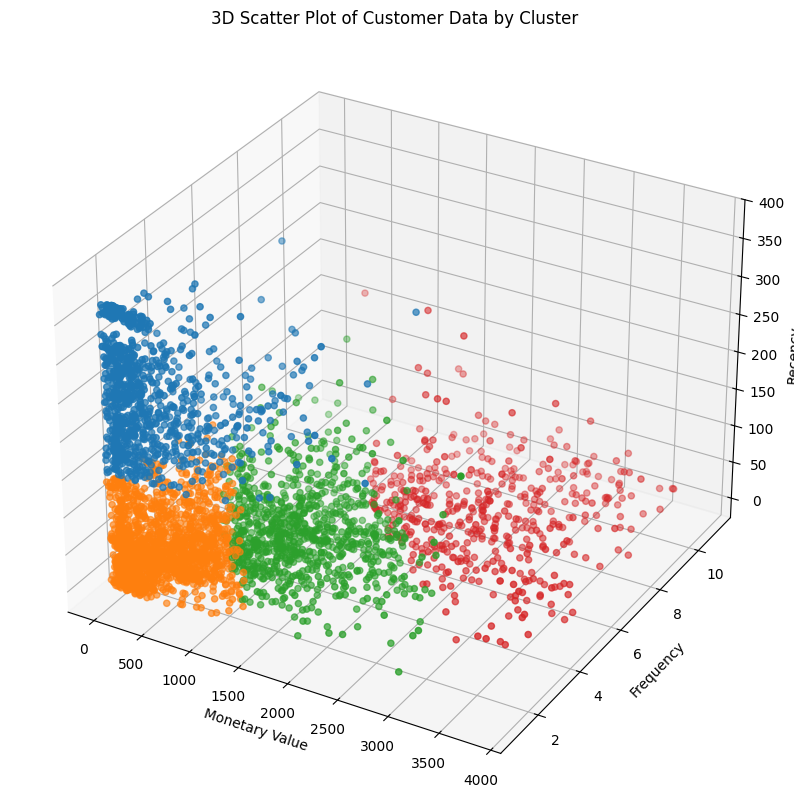

In [119]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

Violin Plot to Provide a More Detailed Understanding of the Clusters

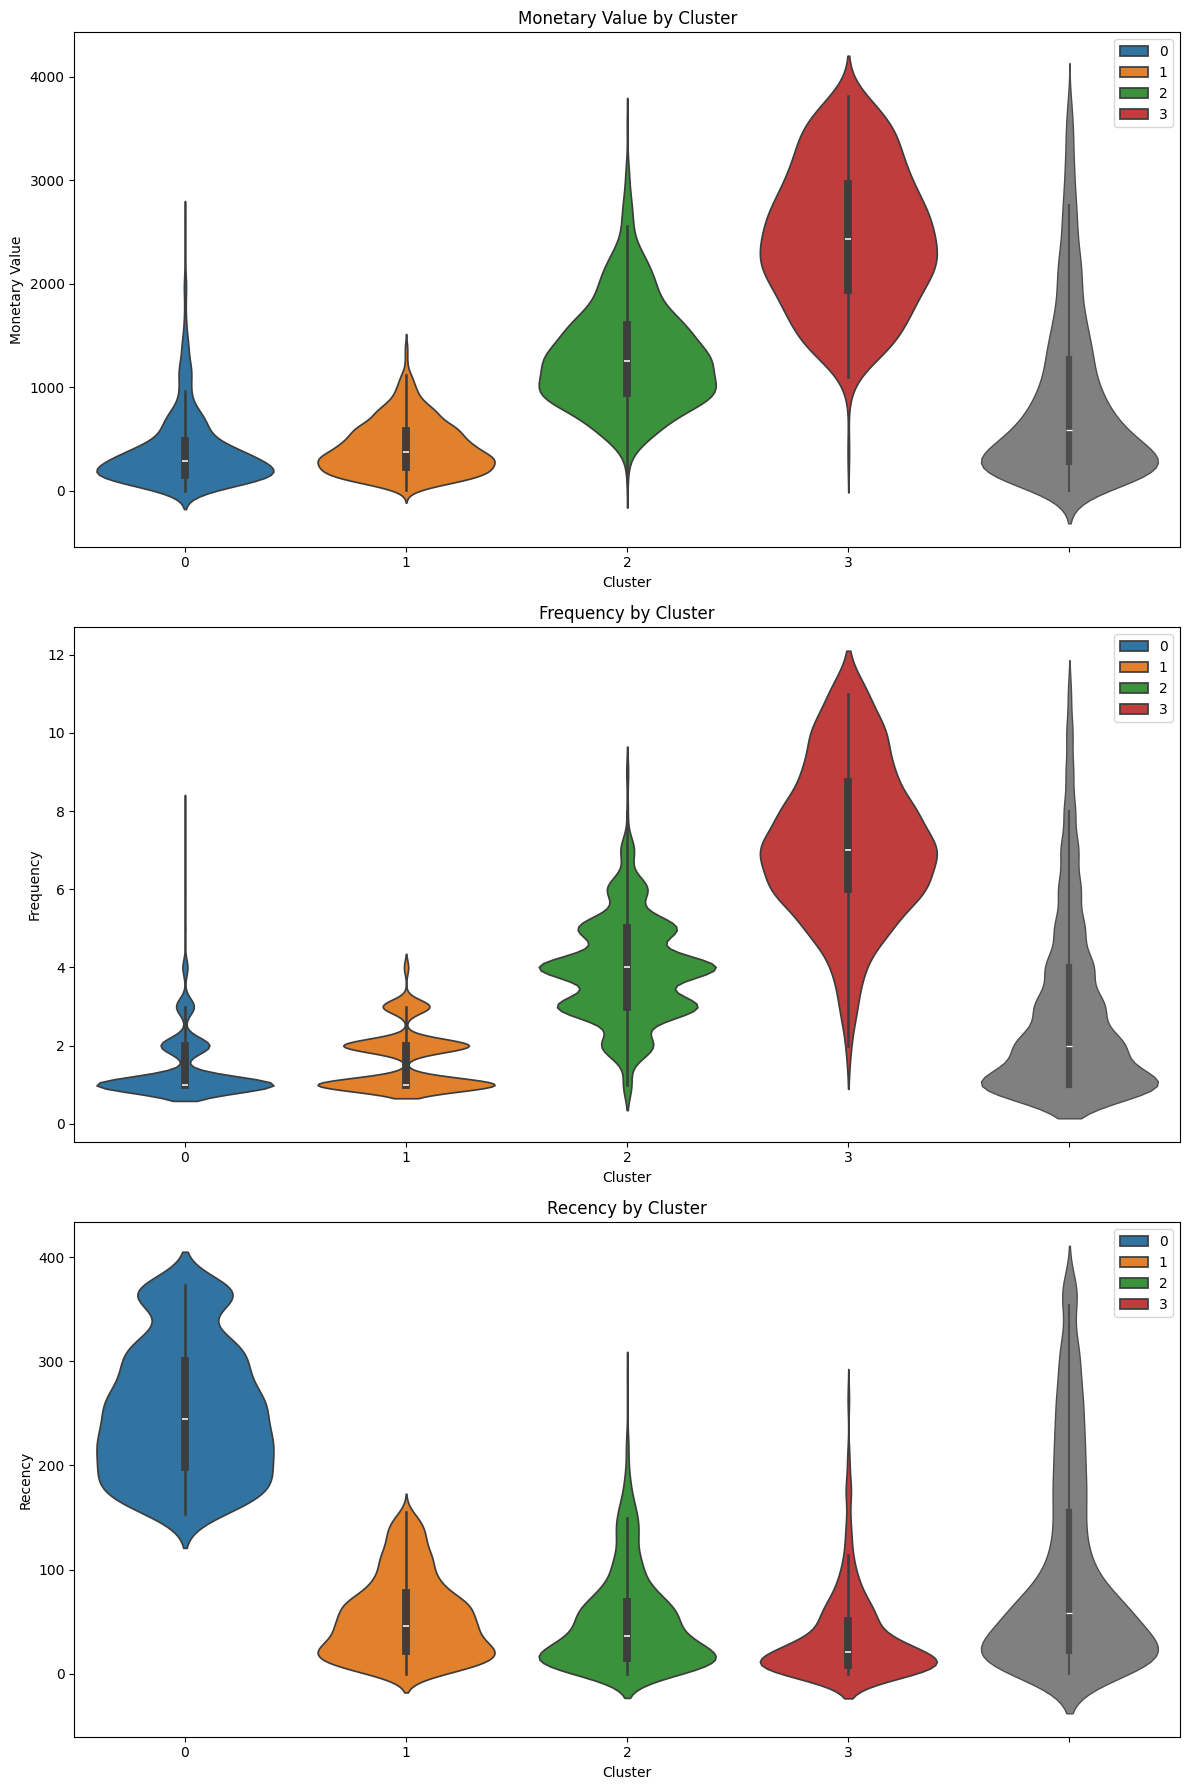

In [120]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1.) Cluster 0 (Blue): "Encourage"
This cluster reflects lower-value, in-frequent customers who haven't purchased recently. To target this cluster, it's important to re-engage this segment and encourage active purchases.

Strategy: Integrated marketing campaigns, discounts, or email reminders can encourage this segment to resume purchasing. 

2.) Cluster 1 (Orange): "Cultivate"
Cluster 1 represents customers who purchased recently, but their purchases are lower-value and infrequent. Customers in this cluster may be new to the company, so it's important to cultivate a strong relationship with this group. 

Strategy: One proposal to target this cluster is to emphasize strong customer service and provide options like providing an email membership discount or email announcements highlighting ongoing sales or deals. 

3.) Cluster 2 (Green): "Maintain"
Cluster 2 reflects frequent customers whose purchases are of moderate-value. The main challenge is that cluster 2 customers haven't purchased recently. 

Strategy: Incorporate loyalty programs, tailored offers for this segment, and purchase suggestions through email to incentivize this segment to purchase again.

4.) Cluster 3 (Red): "Reward"
Cluster 3 represents high-value customers who frequently purchase and purchased recently. It's important to reward their loyalty to maintain their loyalty and keep them engaged.

Strategy: Provide exclusive loyalty programs for cluster 3. This program can include free shipping for the most loyal customers, encouraging this cluster to continue to purchase. These customers can receive exclusive offers and will be the first to hear about upcoming sales or rewards.


Outlier Cluster Analysis

In [124]:
overlapping_indicies= monetary_outliers_df.index.intersection(frequency_outliers_df.index)

mon_only_outliers= monetary_outliers_df.drop(overlapping_indicies)
freq_only_outliers= frequency_outliers_df.drop(overlapping_indicies)
mon_and_freq_outliers=monetary_outliers_df.loc[overlapping_indicies]

mon_only_outliers["Cluster"] = -1
freq_only_outliers["Cluster"] = -2
mon_and_freq_outliers["Cluster"] = -3

outlier_clusters_df= pd.concat([mon_only_outliers,freq_only_outliers,mon_and_freq_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,12079.99,2,2010-11-16 14:29:00,23,-1
26,12380.00,6951.49,7,2010-08-31 14:54:00,100,-1
44,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
50,12415.00,19543.84,7,2010-11-29 15:07:00,10,-1
64,12433.00,7205.39,5,2010-12-08 16:49:00,1,-1
...,...,...,...,...,...,...
4262,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4263,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4264,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4268,18231.00,4797.70,23,2010-10-29 14:17:00,41,-3


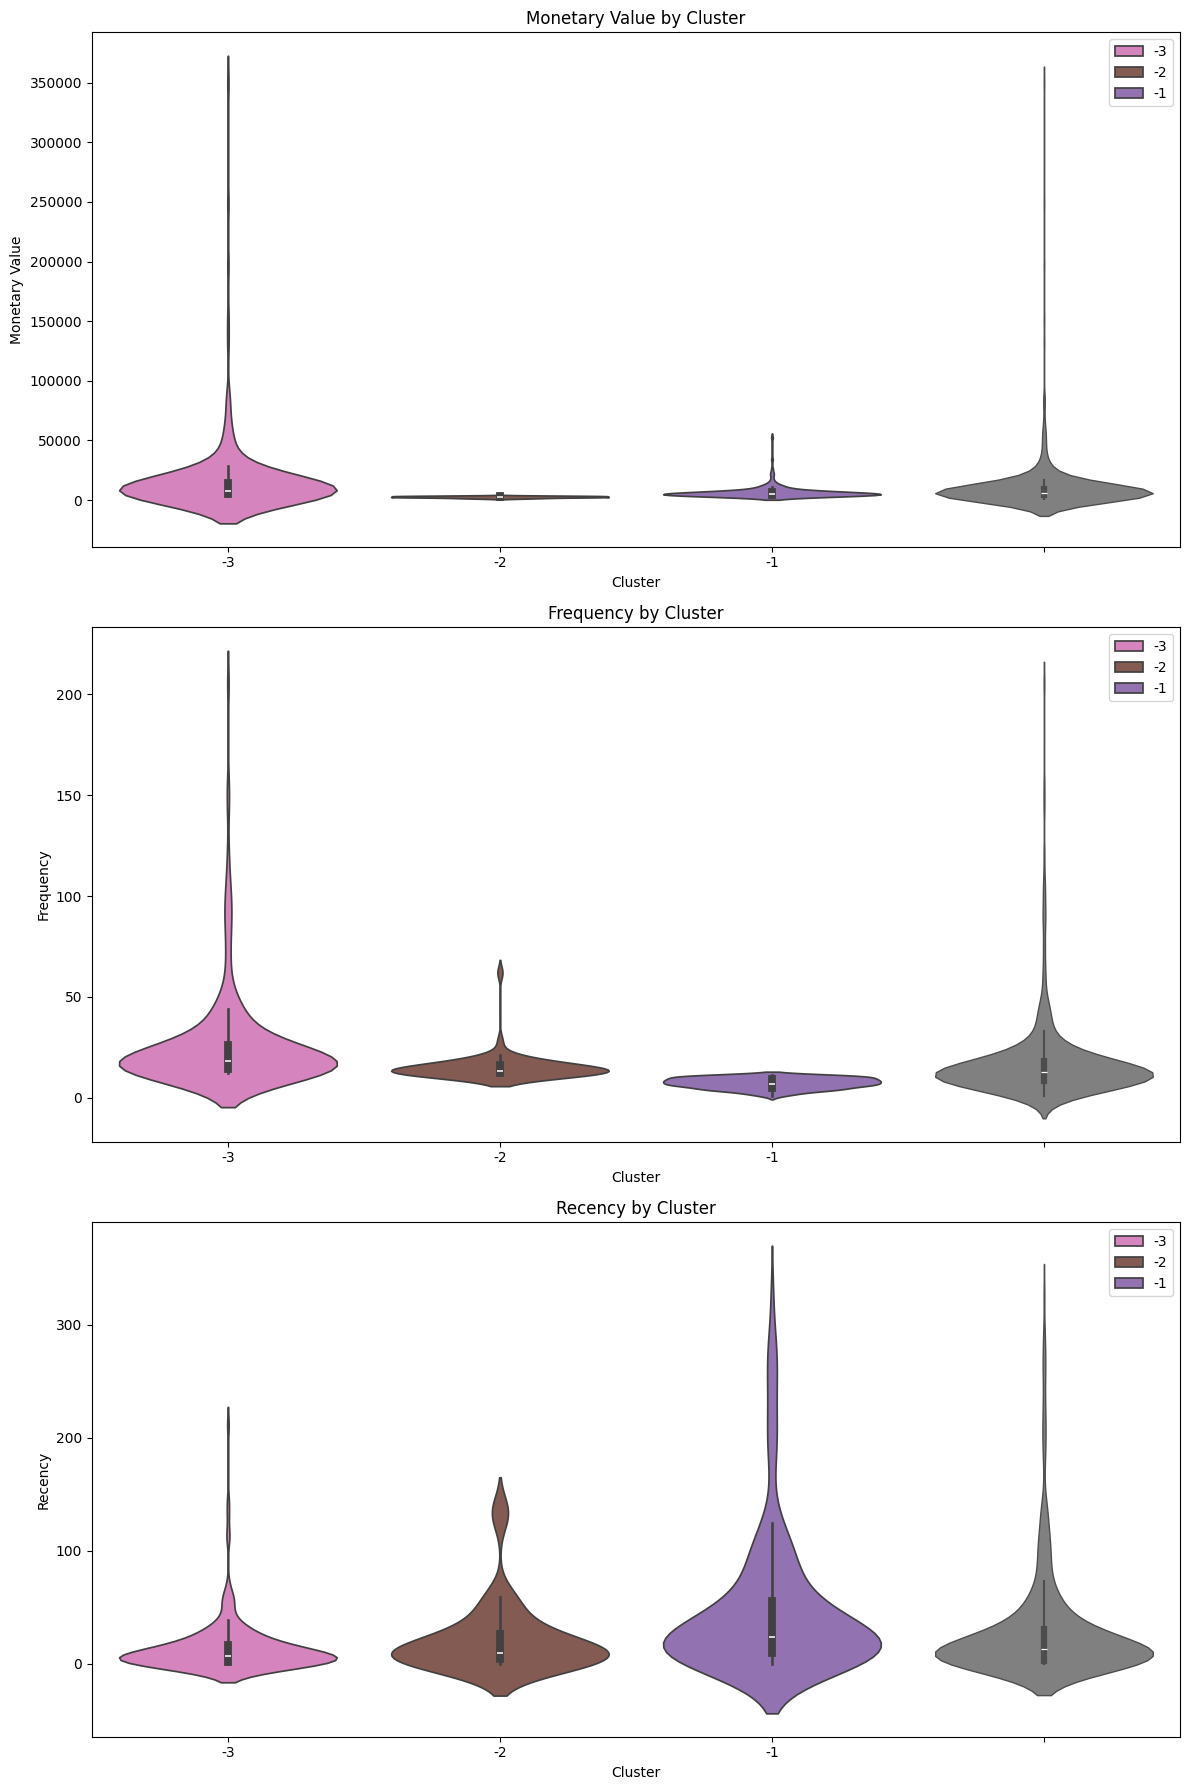

In [128]:
cluster_col= {-1: '#9467bd',
            -2: '#8c564b',
            -3: '#e377c2'}
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_col, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_col, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_col, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Outlier Cluster Explanations

1.) Cluster -3 (Frequency and Monetary Outliers "VIP":
These are the most valuable outlier customers. Customers within this cluster are frequently purchasing and also purchase high-value products. 

Strategy: It's important to keep this segment satisfied through VIP loyalty programs or exclusive offers. This segment can be offered additional customer service or options to keep their loyalty.


2.) Cluster -2 (Frequency Outliers)"Shoppers": 
These customers consistently purchase, but their purchases aren't high-value.

Strategy: Incorporate bundling offers or deals. This cluster may be more succeptible to buying more products as a result of a bundle offer. 

3.) Cluster -1 (Monetary Outliers) "Luxury": 
These are big spenders that don't purchase often.

Strategy: Focus on luxury services or offers that are personalized to capitalize on this segment's pruchasing power.


In [129]:
cluster_labels = {
    0: "Encourage",
    1: "Cultivate",
    2: "Maintain",
    3: "Reward",
    -1: "Luxury",
    -2: "Shoppers",
    -3: "VIPS"
}

In [130]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,372.86,11.00,2010-06-28 13:53:00,164.00,3
1,12347.00,1323.32,2.00,2010-12-07 14:57:00,2.00,2
2,12348.00,222.16,1.00,2010-09-27 14:59:00,73.00,1
3,12349.00,2671.14,3.00,2010-10-28 08:23:00,42.00,2
4,12351.00,300.93,1.00,2010-11-29 15:23:00,10.00,1
...,...,...,...,...,...,...
4262,18223.00,7516.31,12.00,2010-11-17 12:20:00,22.00,-3
4263,18225.00,7545.14,15.00,2010-12-09 15:46:00,0.00,-3
4264,18226.00,6650.83,15.00,2010-11-26 15:51:00,13.00,-3
4268,18231.00,4797.70,23.00,2010-10-29 14:17:00,41.00,-3


In [131]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,372.86,11.00,2010-06-28 13:53:00,164.00,3,Reward
1,12347.00,1323.32,2.00,2010-12-07 14:57:00,2.00,2,Maintain
2,12348.00,222.16,1.00,2010-09-27 14:59:00,73.00,1,Cultivate
3,12349.00,2671.14,3.00,2010-10-28 08:23:00,42.00,2,Maintain
4,12351.00,300.93,1.00,2010-11-29 15:23:00,10.00,1,Cultivate
...,...,...,...,...,...,...,...
4262,18223.00,7516.31,12.00,2010-11-17 12:20:00,22.00,-3,VIPS
4263,18225.00,7545.14,15.00,2010-12-09 15:46:00,0.00,-3,VIPS
4264,18226.00,6650.83,15.00,2010-11-26 15:51:00,13.00,-3,VIPS
4268,18231.00,4797.70,23.00,2010-10-29 14:17:00,41.00,-3,VIPS


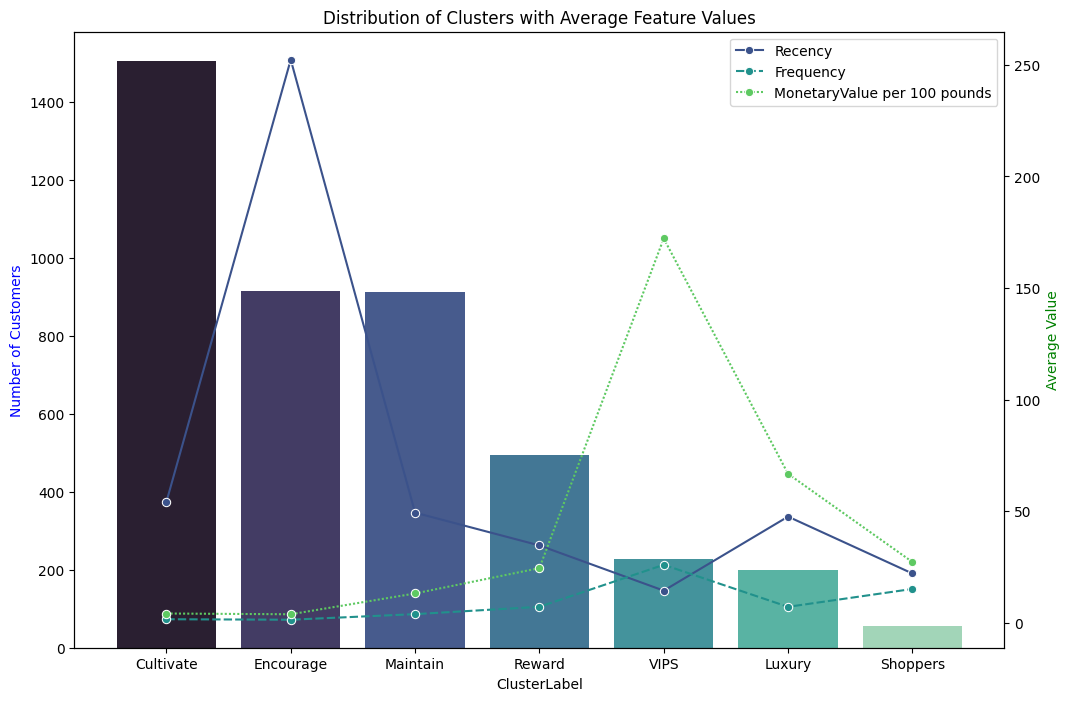

In [140]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='mako', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Distribution of Clusters with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='viridis', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()
